In [1]:
import pandas as pd
import numpy as np
import keras as keras

path_npy = "DatasetsIAO/NumerosBien/"
numeros_train_X = np.load(path_npy + "numeros_train_X.npy")
numeros_train_Y = np.load(path_npy + "numeros_train_Y.npy")
numeros_test_X = np.load(path_npy + "numeros_test_X.npy")
numeros_test_Y = np.load(path_npy + "numeros_test_Y.npy")
numeros_val_X = np.load(path_npy + "numeros_val_X.npy")
numeros_val_Y = np.load(path_npy + "numeros_val_Y.npy")

Using TensorFlow backend.
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [2]:
from keras import models
from keras import layers

# Modelo de red neuronal
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(numeros_train_X, numeros_train_Y, batch_size=32)
val_generator = val_datagen.flow(numeros_val_X, numeros_val_Y, batch_size=32)

from keras import optimizers

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [4]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=numeros_train_X.shape[0]//32,
    epochs=1,
    validation_data=val_generator,
    validation_steps=numeros_val_X.shape[0]//32
    )

Epoch 1/1
38/38 [==============================] - 4s 102ms/step - loss: 2.3027 - acc: 0.0945 - val_loss: 2.3027 - val_acc: 0.1042


In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()
plt.grid(linestyle='-', linewidth=1.6, alpha=0.3)
plt.plot(epochs, acc, 'b', linewidth=1.0, label='Training acc')
plt.plot(epochs, val_acc, 'r', linewidth=1.0, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
# plt.show()
plt.savefig("graph1.png")

plt.clf()
plt.grid(linestyle='-', linewidth=1.6, alpha=0.3)
plt.plot(epochs, loss, 'b', linewidth=1.0, label='Training loss')
plt.plot(epochs, val_loss, 'r', linewidth=1.0, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
# plt.savefig("graph2.png")

412/412 [==============================] - 0s 736us/step
Test acc: 0.08737864077669903


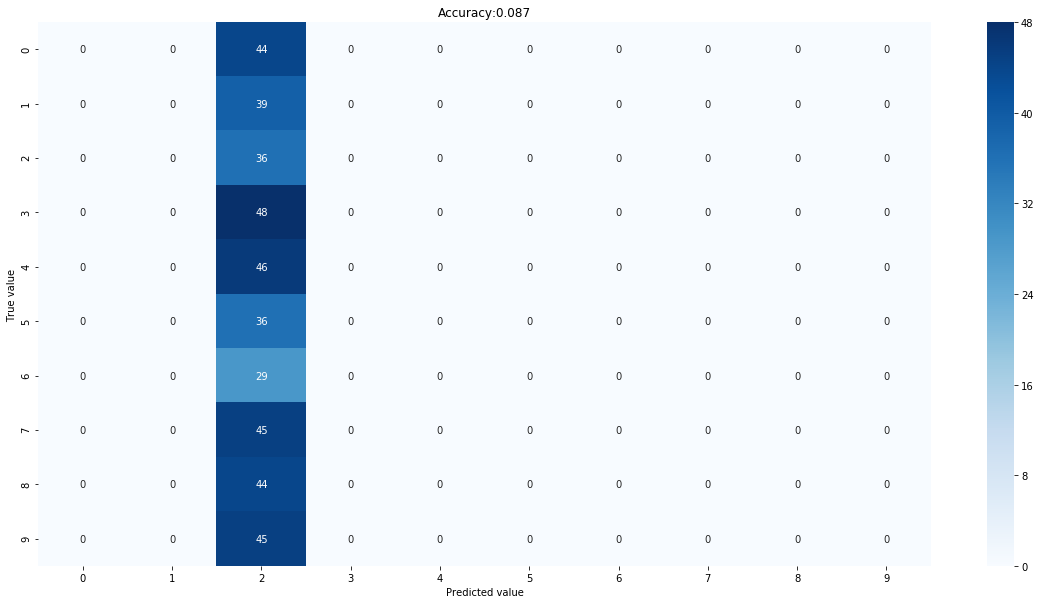

In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import keras
import numpy as np
from sklearn.metrics import  confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# model = keras.models.load_model("modelo.h5")

# Paso el one hot encoding a integer
labels = np.where(numeros_test_Y==1)[1]

# Hago el predict en el conjunto de test
pred = model.predict(numeros_test_X, verbose=1)

#pred = np.round(pred)
pred = np.argmax(pred, axis=1)

#Ahora puedo hacer la matriz de confusion
cm = confusion_matrix(labels, pred)

cm_sn = pd.DataFrame(cm)

plt.figure(figsize=(20,10))
sns.heatmap(cm_sn, annot=True, cmap='Blues', fmt='g')
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(labels, pred)))
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()
# plt.savefig("matriz.png")
print("Test acc: " + str(accuracy_score(labels, pred)))